# Limelight Studios Movie Industry Analysis

Elina Rankova<br>
Bekah McLaughlin


<div style="width: 100%; text-align: center;">
  <img src="https://www.citylit.ac.uk/media/amasty/blog/film_v1-min.jpg" width="720" height="450" style="margin: 0 auto;"/>
</div>

<u>image source</u>: <a href="https://www.citylit.ac.uk/blog/whats-the-point-of-studying-film">Why Study Film Blog Post</a>

## 1. Business Problem and Understanding

**Stakeholders:** C-Suite leaders; Founder, CEO, CFO, COO.

As a respected member of the entertainment industry, our founder and sole investor is eager to make themselves a name in the Movie industry as a producer of valuable stories while maintaining a profit. Since reputation is important, we not only want to focus on gross, but popularity as well since we want our movies to be memorable. We are excited to work with established creators and provide them a platform to thrive both within their primary genre and branch out to diversify their portfolio and talents.

To reiterate, since we want the opportunity to continue to create in the future, we will focus on gross profit and evaluate how it correlates to other factors such as popularity.

There is a focus on a wide range of audiences and world wide reach so for the first phase of this initative, we will be evaluating world-wide grossing data as well as including all languages and regions in our analysis. In future expansion, we will want to evaluate such specifics however.

Lastly, we will narrow down our search to years post the millenium as that is the start of the most recent era within movie history. In addition, our data limits our timeline not to 2023 but to 2019. This is another consideration for future endevours.

**Source:** <a href = "http://www.historyoffilm.net/movie-eras/history-of-cinema/#:~:text=With%20over%20100%20years%20of,every%20decade%20of%20its%20history.">Movie Eras - History of Cinema and the First Film</a>

**Preliminary Questions include:**

- *What genres make sense to invest based on profit and popularity among viewers?*
- *Which measure of central tendency makes sense as a reference for starting production budget for each identified genre?*
- *With which creators do we want to initate relationships within identified genres?*

Databases used and explored: 
- <a href = "https://www.boxofficemojo.com/">Box Office Mojo</a>
- <a href = "https://www.imdb.com/">IMDb</a>
- <a href = "https://www.rottentomatoes.com/">Rotten Tomatoes</a>
- <a href = "https://www.themoviedb.org/">TheMovieDB</a>
- <a href = "https://www.the-numbers.com/">TheNumbers</a>

**The goal:** Identify genres, production budget per genre, and creators in which to invest in phase 1. We want to both focus on profit and viewability based on popularity among viewers. As well as analyze which creators with whom to form relationships as we launch our first productions.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3
import re
from datetime import datetime

%matplotlib inline


In [2]:
# Load in csv & tsv data

# tsv's are tabbular and take '\t' as the delimiter
# 'rt.reviews.tsv' did not take default uft-8 decoding

df_gross = pd.read_csv('Data/bom.movie_gross.csv')
df_info = pd.read_csv('Data/rt.movie_info.tsv', delimiter='\t')
df_rev = pd.read_csv('Data/rt.reviews.tsv', delimiter='\t', encoding='latin-1')
df_tmdb = pd.read_csv('Data/tmdb.movies.csv', index_col=0)
df_budget = pd.read_csv('Data/tn.movie_budgets.csv')

In [3]:
# create sql connection to database
conn = sqlite3.connect('Data/im.db')
cur = conn.cursor()

In [4]:
# Join movie_basics and movie_ratings & create df

q = ''' SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
'''

df_basics = pd.read_sql(q, conn)

In [5]:
# Join persons with directors
q = ''' SELECT *
FROM persons
JOIN directors
USING (person_id)
'''

df_directors = pd.read_sql(q, conn)

In [6]:
# Join persons with then movie_basics
q = ''' SELECT *
FROM persons
JOIN writers
USING (person_id)
'''

df_writers = pd.read_sql(q, conn)

In [7]:
# Join persons with known_for
q = ''' SELECT *
FROM persons
JOIN known_for
USING (person_id)
'''

df_known_for = pd.read_sql(q, conn)

In [8]:
# Create df for movie_akas

q = '''
SELECT *
FROM movie_akas
'''
df_akas = pd.read_sql(q,conn)

In [9]:
# Create df for principals

q = '''
SELECT *
FROM principals
'''
df_principals = pd.read_sql(q,conn)

## 2. Data Structure Exploration

In [73]:
# Create function to get df summary
def df_summary(df):
    print(df.head(3))
    print('________________________________')
    print('INFO')
    print(df.info())
    print('________________________________')
    print('NaN SUM')
    print(df.isna().sum())
    print('________________________________')
    print('NaN PERCENTAGE')
    print(df.isna().sum()/len(df)*100)

### `df_basics`

- Drop nas
- Lowercase object columns
- Lots of movie information we can use once merged with other tables/datasets

In [74]:
df_summary(df_basics)

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   

   start_year  runtime_minutes              genres  averagerating  numvotes  
0        2013            175.0  Action,Crime,Drama            7.0        77  
1        2019            114.0     Biography,Drama            7.2        43  
2        2018            122.0               Drama            6.9      4517  
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3 

### `df_akas`

- Too much language information missing to be able to use, ideally we can get `region` and `language` details for phase 2

In [75]:
df_summary(df_akas)

    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   

  language        types attributes  is_original_title  
0       bg         None       None                0.0  
1     None  imdbDisplay       None                0.0  
2     None  imdbDisplay       None                0.0  
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-nul

### `df_directors`, `df_writers`, `df_known_for`

- Great resource to find creators we can work with once merged with `df_basics`

In [76]:
print('DIRECTORS')
df_summary(df_directors)
print('___________________________________________________________________________')
print('WRITERS')
df_summary(df_writers)
print('___________________________________________________________________________')
print('KNOWN FOR')
df_summary(df_known_for)

DIRECTORS
   person_id    primary_name  birth_year  death_year  \
0  nm0062879  Ruel S. Bayani         NaN         NaN   
1  nm0062879  Ruel S. Bayani         NaN         NaN   
2  nm0062879  Ruel S. Bayani         NaN         NaN   

                          primary_profession   movie_id  
0  director,production_manager,miscellaneous  tt1592569  
1  director,production_manager,miscellaneous  tt1592569  
2  director,production_manager,miscellaneous  tt1592569  
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291171 entries, 0 to 291170
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           291171 non-null  object 
 1   primary_name        291171 non-null  object 
 2   birth_year          68608 non-null   float64
 3   death_year          1738 non-null    float64
 4   primary_profession  290187 non-null  object 
 5   movie_id            291171 non

### `df_principals`

- Not sure if we will use this table, too much missing information
- If we do, we may be able to fill in from other tables

In [77]:
df_summary(df_principals)

    movie_id  ordering  person_id  category       job   characters
0  tt0111414         1  nm0246005     actor      None  ["The Man"]
1  tt0111414         2  nm0398271  director      None         None
2  tt0111414         3  nm3739909  producer  producer         None
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB
None
________________________________
NaN SUM
movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64
__________

### `df_gross`

- `df_budget` has more complete info on gross numbers. May not use.

In [78]:
df_summary(df_gross)

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
________________________________
NaN SUM
title                0
studio             

### `df_info`

- Too many missing values. May not use.
- Missing movie title column to be able to merge with other datasets.
- Would want to fill in the blanks of boxoffice numbers and other information for phase 2.

In [79]:
df_summary(df_info)

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   

                         writer  theater_date      dvd_date currency  \
0                Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1  David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
2                Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   

  box_office      runtime             studio  
0        NaN  104 minutes                NaN  
1    600,000  108 minutes  Entertainment One  
2        NaN  116 minutes                NaN  
_____________

### `df_rev`

- Not sure if there is enough significant information.

In [80]:
df_summary(df_rev)

   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  obje

### `df_tmdb`

- No nulls
- Create new column `release_year` from `release_date`

In [81]:
df_summary(df_tmdb)

             genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                      How to Train Your Dragon           7.7        7610  
2                                    Iron Man 2           6.8       12368  
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype

### `df_budget`

- No nulls
- 'movie' = 'title'
- Adjust 'release_date' if using for analysis
- Adjust 'gross' columns to int
- Create new column `release_year` from `release_date`

In [82]:
df_summary(df_budget)

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
________________________________
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   ob

## 3. Data Cleaning & Preprocessing

In [83]:
# Lowercase function
def lowercase(df):
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.lower()
    return df

### Cleaning `df_basics`

Minimum cleaning necessary, we were able to drop nan rows without losing too much data. We also created a `primary_genre` column, taking the first listed genre in the `genres` column.

In [21]:
# Make cleaning copy
df_basics_c = df_basics.copy()
print("\nShape before cleaning:",df_basics_c.shape)

# Address lowercase
lowercase(df_basics_c)

# Replace 0s & blank spaces with nas
df_basics_c.replace(0,np.nan,inplace=True)
df_basics_c = df_basics_c.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
print("\nnan check:\n", df_basics_c.isna().sum()/len(df_basics_c)*100)

# Drop remaining nans
df_basics_c.dropna(inplace=True)

# Create primary_genre column
df_basics_c['primary_genre'] = df_basics_c.genres.apply(lambda x: x.split(',')[0])

# Get rid of duplicates based on movie_id
df_basics_c.drop_duplicates(inplace=True,subset='movie_id')

print("\nShape after cleaning:",df_basics_c.shape)
display(df_basics_c.head())


Shape before cleaning: (73856, 8)

nan check:
 movie_id            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
averagerating       0.000000
numvotes            0.000000
dtype: float64

Shape after cleaning: (65720, 9)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_genre
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,action
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"biography,drama",7.2,43,biography
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,drama,6.9,4517,drama
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"comedy,drama,fantasy",6.5,119,comedy
6,tt0137204,joe finds grace,joe finds grace,2017,83.0,"adventure,animation,comedy",8.1,263,adventure


It looks like this dataset is missing 10 years of information from the timeline we are looking at based on the release year in other databases which maxes out at 2020 and the information found about the newest era being post millenium.

**Source:** <a href = "http://www.historyoffilm.net/movie-eras/history-of-cinema/#:~:text=With%20over%20100%20years%20of,every%20decade%20of%20its%20history.">Movie Eras - History of Cinema and the First Film</a>

**note:** some of these databases, such as `df_basics_c` only go up to 2019. In the case of this present dataset, it also only begins at 2010, excluding 10 years from our intended analysis.

In [22]:
print("release_year range before filtering:", df_basics_c.start_year.min(), df_basics_c.start_year.max())

# Filter out years before 2000
df_basics_c = df_basics_c[df_basics_c['start_year']>1999]
print(df_basics_c.shape)

release_year range before filtering: 2010 2019
(65720, 9)


### Cleaning `df_tmdb`

While cleaning, certain 0s unmarked as nans were uncovered in the `average_votes` column. The number is small so we can drop these numbers. If we want to use in analysis for average votes for each `primary_genre` we can potentially distribute based on relative probability. Decided to check for object missingness not registering as nans and found ~9% of `genre_ids` missing as well.

To match `genre_ids` with their respective genre name, we used <a href = "https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee">The Movie Databse</a> as reference.

In [23]:
# Create a cleaning copy
df_tmdb_c = df_tmdb.copy()
print("\nShape before cleaning:",df_tmdb_c.shape)

# Address lowercase
lowercase(df_tmdb_c)
    
# create release_year column and convert to int
df_tmdb_c['release_year'] = df_tmdb_c['release_date'].apply(lambda x: int(x.split('-')[0]))

# strip genre_ids of []
df_tmdb_c['genre_ids'] = df_tmdb_c['genre_ids'].apply(lambda x: x.strip('[]').strip(""))

# Replace 0s & blank spaces with nas
df_tmdb_c.replace(0,np.nan,inplace=True)
df_tmdb_c = df_tmdb_c.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
print('\nnan check:\n',df_tmdb_c.isna().sum()/len(df_tmdb_c)*100)

# Drop remaining nans
df_tmdb_c.dropna(inplace=True)

# extract primary genre_id & create a new column 'primary_genre'
df_tmdb_c['primary_genre'] = df_tmdb_c['genre_ids'].apply(lambda x: x.split(',')[0])


data_text = '''
Action          28
Adventure       12
Animation       16
Comedy          35
Crime           80
Documentary     99
Drama           18
Family          10751
Fantasy         14
History         36
Horror          27
Music           10402
Mystery         9648
Romance         10749
Science_Fiction 878
TV Movie        10770
Thriller        53
War             10752
Western         37
'''

# Convert the text into a list of tuples
genre_list = [tuple(line.split(maxsplit=1)) for line in data_text.strip().split('\n')]

# Convert the list of into a dictionary
genre_dict = dict(genre_list)

# Iterate over each genre_ids to replace with genre name bsed on genre_dict
for k, v in genre_dict.items():
    df_tmdb_c.loc[df_tmdb_c['primary_genre'].str.contains(v), 'primary_genre'] = k.lower()

print("\nShape after cleaning:",df_tmdb_c.shape)


Shape before cleaning: (26517, 9)

nan check:
 genre_ids            9.348720
id                   0.000000
original_language    0.000000
original_title       0.000000
popularity           0.000000
release_date         0.000000
title                0.000000
vote_average         0.512879
vote_count           0.000000
release_year         0.000000
dtype: float64

Shape after cleaning: (23922, 11)


In [24]:
print("release_year range before filtering:", df_tmdb_c.release_year.min(), df_tmdb_c.release_year.max())

# Filter out years before 2000
df_tmdb_c = df_tmdb_c[df_tmdb_c['release_year']>1999]
print("release_year range before filtering:", df_tmdb_c.release_year.min(), df_tmdb_c.release_year.max())
print("\nShape after year adjustment:",df_tmdb_c.shape)

release_year range before filtering: 1930 2019
release_year range before filtering: 2000 2019

Shape after year adjustment: (23806, 11)


It looks like `vote_average` is out of 10 so can be considered a 'rating' potentially. It's possible `popularity` is out of 100, though the max is 80.773. The max year is 2019, only a year away from our desired max which is closer to the range we want to use than other table with genre information. While not extreme, this is something we want to note.

In [25]:
# Explore columns

print("vote_average range:", df_tmdb_c.vote_average.values.min(), df_tmdb_c.vote_average.values.max())
print("popularity range:", df_tmdb_c.popularity.values.min(), df_tmdb_c.popularity.values.max())
print("release_year range:", df_tmdb_c.release_year.min(), df_tmdb_c.release_year.max())
print("top_10_languages:", df_tmdb_c.original_language.value_counts().head(10))

vote_average range: 0.5 10.0
popularity range: 0.6 80.773
release_year range: 2000 2019
top_10_languages: original_language
en    20736
fr      495
es      424
ru      292
ja      253
de      227
zh      169
hi      168
it      110
ko       92
Name: count, dtype: int64


### Cleaning `df_budget`

There wasn't any missingness but we did have to clean up the gross columns to adjust the data types.

In [26]:
# Create cleaning copy
df_budget_c = df_budget.copy()
print("\nShape before cleaning:",df_budget_c.shape)

# Address lowercase 
lowercase(df_budget_c).head(10)

# Adjust release_date structure
df_budget_c.release_date = pd.to_datetime(df_budget_c.release_date,format='%b %d, %Y')
df_budget_c.release_date = df_budget_c.release_date.dt.strftime('%Y-%m-%d')

# Create release_year as an int
df_budget_c['release_year'] = df_budget_c['release_date'].apply(lambda x: int(x.split('-')[0]))

# Convert dollar columns to int
df_budget_c['production_budget'] = df_budget_c['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
df_budget_c['domestic_gross'] = df_budget_c['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
df_budget_c['worldwide_gross'] = df_budget_c['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

# Create foreign_gross column
df_budget_c['foreign_gross'] = df_budget_c.worldwide_gross - df_budget_c.domestic_gross

# blank spaces with nas
df_budget_c = df_budget_c.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
print('\nnan check:\n',df_budget_c.isna().sum()/len(df_budget_c)*100)

# Drop remaining nans
df_budget_c.dropna(inplace=True)

print("\nShape after cleaning:",df_budget_c.shape)
df_budget_c.head()


Shape before cleaning: (5782, 6)

nan check:
 id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
release_year         0.0
foreign_gross        0.0
dtype: float64

Shape after cleaning: (5782, 8)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,foreign_gross
0,1,2009-12-18,avatar,425000000,760507625,2776345279,2009,2015837654
1,2,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,2011,804600000
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350,2019,107000000
3,4,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,2015,944008095
4,5,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,2017,696540365


Adjust the year in the dataset based on estabilished range.

In [27]:
print("release_year range before filtering:", df_budget_c.release_year.min(), df_budget_c.release_year.max())

# Filter out years before 2000
df_budget_c = df_budget_c[df_budget_c['release_year']>1999]
print(df_budget_c.shape)

release_year range before filtering: 1915 2020
(4387, 8)


### Cleaning `df_directors`

In the case of person tables with a `death_year` we first need to drop rows with a value to keep only those still alive. Then we were able to drop the `birth_year` and `death_year` columns.

In [28]:
df_directors_c = df_directors.copy()
print("\nShape before cleaning:",df_directors_c.shape)

# Address lowercase
lowercase(df_directors_c)

# Replace 0s & blank spaces with nas
df_directors_c.replace(0,np.nan,inplace=True)
df_directors_c = df_directors_c.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
print("\nnan check:\n", df_directors_c.isna().sum()/len(df_directors_c)*100)

# Drop rows with existing `death_year` to isolate those alive
df_directors_c.drop(df_directors_c[df_directors_c['death_year']>0].index,inplace=True,axis=0)

# Drop 'death_year' and `birth_year` column
df_directors_c.drop(['death_year','birth_year'],inplace=True, axis=1)

# Drop remaining nans
df_directors_c.dropna(inplace=True)

print("\nShape after cleaning:",df_directors_c.shape)
display(df_directors_c.head())


Shape before cleaning: (291171, 6)

nan check:
 person_id              0.000000
primary_name           0.000000
birth_year            76.437214
death_year            99.403100
primary_profession     0.337946
movie_id               0.000000
dtype: float64

Shape after cleaning: (288449, 4)


,person_id,primary_name,primary_profession,movie_id
0,nm0062879,ruel s. bayani,"director,production_manager,miscellaneous",tt1592569
1,nm0062879,ruel s. bayani,"director,production_manager,miscellaneous",tt1592569
2,nm0062879,ruel s. bayani,"director,production_manager,miscellaneous",tt1592569
3,nm0062879,ruel s. bayani,"director,production_manager,miscellaneous",tt1592569
4,nm0062879,ruel s. bayani,"director,production_manager,miscellaneous",tt2057445


### Cleaning `df_writers`

In the case of person tables with a `death_year` we first need to drop rows with a value to keep only those still alive. Then we were able to drop the `birth_year` and `death_year` columns.

In [29]:
df_writers_c = df_writers.copy()
print("\nShape before cleaning:",df_writers_c.shape)

# Address lowercase
lowercase(df_writers_c)

# Replace 0s & blank spaces with nas
df_writers_c.replace(0,np.nan,inplace=True)
df_writers_c = df_writers_c.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
print("\nnan check:\n", df_writers_c.isna().sum()/len(df_writers_c)*100)

# Drop rows with existing `death_year` to isolate those alive
df_writers_c.drop(df_writers_c[df_writers_c['death_year']>0].index,inplace=True,axis=0)

# Drop 'death_year' and `birth_year` column
df_writers_c.drop(['death_year','birth_year'],inplace=True, axis=1)

# Drop remaining nans
df_writers_c.dropna(inplace=True)

print("\nShape after cleaning:",df_writers_c.shape)
display(df_writers_c.head())


Shape before cleaning: (255871, 6)

nan check:
 person_id              0.000000
primary_name           0.000000
birth_year            79.318876
death_year            98.406228
primary_profession     0.329072
movie_id               0.000000
dtype: float64

Shape after cleaning: (250952, 4)


,person_id,primary_name,primary_profession,movie_id
0,nm0064023,bryan beasley,"director,producer,writer",tt3501180
1,nm0065847,michael frost beckner,"writer,producer,miscellaneous",tt6349302
2,nm0068874,hava kohav beller,"director,writer,producer",tt7701650
3,nm0070482,joel bender,"editor,director,writer",tt3790232
4,nm0070482,joel bender,"editor,director,writer",tt3790232


### Cleaning `df_known_for`

In the case of person tables with a `death_year` we first need to drop rows with a value to keep only those still alive. Then we were able to drop the `birth_year` and `death_year` columns.

In [30]:
df_known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   person_id           1638260 non-null  object 
 1   primary_name        1638260 non-null  object 
 2   birth_year          319134 non-null   float64
 3   death_year          24469 non-null    float64
 4   primary_profession  1580490 non-null  object 
 5   movie_id            1638260 non-null  object 
dtypes: float64(2), object(4)
memory usage: 75.0+ MB


In [31]:
df_known_for_c = df_known_for.copy()
print("\nShape before cleaning:",df_known_for_c.shape)

# Address lowercase
lowercase(df_known_for_c)

# Replace 0s & blank spaces with nas
df_known_for_c.replace(0,np.nan,inplace=True)
df_known_for_c = df_known_for_c.map(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
print("\nnan check:\n", df_known_for_c.isna().sum()/len(df_writers_c)*100)

# Drop rows with existing `death_year` to isolate those alive
df_known_for_c.drop(df_known_for_c[df_known_for_c['death_year']>0].index,inplace=True,axis=0)

# Drop 'death_year' and `birth_year` column
df_known_for_c.drop(['death_year','birth_year'],inplace=True, axis=1)

# Drop remaining nans
df_known_for_c.dropna(inplace=True)

print("\nShape after cleaning:",df_known_for_c.shape)
display(df_known_for_c.head())


Shape before cleaning: (1638260, 6)

nan check:
 person_id               0.000000
primary_name            0.000000
birth_year            525.648730
death_year            643.067599
primary_profession     23.020339
movie_id                0.000000
dtype: float64

Shape after cleaning: (1557712, 4)


,person_id,primary_name,primary_profession,movie_id
0,nm0061671,mary ellen bauder,"miscellaneous,production_manager,producer",tt0118553
1,nm0061671,mary ellen bauder,"miscellaneous,production_manager,producer",tt0837562
2,nm0061671,mary ellen bauder,"miscellaneous,production_manager,producer",tt0844471
3,nm0061671,mary ellen bauder,"miscellaneous,production_manager,producer",tt2398241
4,nm0061865,joseph bauer,"composer,music_department,sound_department",tt0287072


### Data Merging

#### `df_budget_c` and `df_tmdb_c`

We want to merge `df_budget_c` and `df_tmdb_c` to compare grossing information with `popularity`, `vote_average`, and `primary_genre`. Since `df_budget_c` is so much smaller, it will serve as the base for this analysis to avoid having to drop nan rows. 

We will attempt to merge on `movie` and `title`, so first, we will adjust the names of those columns for ease then create a unique identifier column combining `movie_title` and `release_date`. Then we can clean up the data and delete any duplicate values.

**Note:** After deleting duplicates, there are still 4 records with the same `movie_id` identifier column in `df_tmdb_c` we created. Since it is a small portion of the data, we drop those as well.

In [32]:
# Rename columns in each df
df_tmdb_c.rename(columns={"title":"movie_title"},inplace=True)
df_budget_c.rename(columns={"movie":"movie_title"},inplace=True)

# Create unique identifier column in both dbs with movie_title + release_year to try to eliminate duplicate movie_titles
df_tmdb_c['movie_id'] = df_tmdb_c[['movie_title','release_date']].apply(lambda x: ''.join(x.astype(str)),axis=1)
df_budget_c['movie_id'] = df_budget_c[['movie_title','release_date']].apply(lambda x: ''.join(x.astype(str)),axis=1)

# Get rid of all characters in unique identifier column
df_tmdb_c['movie_id'] = df_tmdb_c['movie_id'].apply(lambda x: re.sub(r'[^\w\s]|_|\s', '', x))
df_budget_c['movie_id'] = df_budget_c['movie_id'].apply(lambda x: re.sub(r'[^\w\s]|_|\s', '', x))

# Get rid of duplicates
df_tmdb_c.drop_duplicates(inplace=True,subset='movie_id')
df_budget_c.drop_duplicates(inplace=True,subset='movie_id')

df_tmdb_c.movie_id.value_counts()
df_budget_c.movie_id.value_counts()

# Check shape of each dataset
print(df_budget_c.shape)
print(df_tmdb_c.shape)

(4387, 9)
(22820, 12)


In [33]:
# Merge bsed on unique movie_id
tmdb_budget = pd.merge(df_budget_c,df_tmdb_c,on='movie_id')
tmdb_budget.drop(['release_year_y','movie_title_y','release_date_y','id_y','id_x',
              'genre_ids','original_title'],inplace=True,axis=1)
tmdb_budget.shape

(1297, 13)

#### `df_tmdb_c` and `df_basics_c`

Now we can repeat the process for `df_tmdb_c` and `df_basics_c` to be able to get more complete genre information.|

In [34]:
# Rename columns in each df_basics
df_basics_c.rename(columns={"primary_title":"movie_title"},inplace=True)

# Create unique identifier column in both dbs with movie_title + release_year to try to eliminate duplicate movie_titles
df_tmdb_c['movie_id2'] = df_tmdb_c[['movie_title','release_year']].apply(lambda x: ''.join(x.astype(str)),axis=1)
df_basics_c['movie_id2'] = df_basics_c[['movie_title','start_year']].apply(lambda x: ''.join(x.astype(str)),axis=1)

# Get rid of all characters in unique identifier column
df_tmdb_c['movie_id2'] = df_tmdb_c['movie_id2'].apply(lambda x: re.sub(r'[^\w\s]|_|\s', '', x))
df_basics_c['movie_id2'] = df_basics_c['movie_id2'].apply(lambda x: re.sub(r'[^\w\s]|_|\s', '', x))


In [54]:
# Merge based on movie_id2
basics_tmdb = pd.merge(df_basics_c,df_tmdb_c, on='movie_id2')

# Drop unnecessary columns
to_drop = ['_x_x','_y','_x_y']
mask = basics_tmdb.columns.str.contains('|'.join(to_drop))
basics_tmdb.drop(basics_tmdb.columns[mask],axis=1,inplace=True)

# Drop duplicates
basics_tmdb.drop_duplicates(subset='movie_id_x',inplace=True)

basics_tmdb.head()

,movie_id_x,movie_title_x,original_title_x,runtime_minutes,genres,averagerating,numvotes,primary_genre_x,movie_id2,genre_ids,id,original_language,popularity,release_date,vote_average,vote_count
0,tt0069049,the other side of the wind,the other side of the wind,122.0,drama,6.9,4517,drama,theothersideofthewind2018,"35, 18",299782,en,9.800,2018-11-02,7.0,64
1,tt0192528,heaven & hell,reverse heaven,104.0,drama,4.0,72,drama,heavenhell2018,18,567662,en,0.600,2018-11-06,7.5,2
2,tt0255820,return to babylon,return to babylon,75.0,"biography,comedy,drama",5.9,123,biography,returntobabylon2013,"35, 18",323498,en,0.877,2013-08-11,7.0,1
3,tt0315642,wazir,wazir,103.0,"action,crime,drama",7.1,15378,action,wazir2016,"53, 28, 80, 18, 9648",275269,hi,3.881,2016-01-08,6.6,63
4,tt0326965,in my sleep,in my sleep,104.0,"drama,mystery,thriller",5.5,1889,drama,inmysleep2010,"53, 9648",40048,en,1.795,2010-04-23,5.4,20


We can see that merging these datasets drastically cuts down the number of rows. Therefore, are not able to get valuable analysis from this.

In [55]:
# Create unique identifier column in df_budget_c with movie_title + release_year to try to eliminate duplicate movie_titles
df_budget_c['movie_id2'] = df_budget_c[['movie_title','release_year']].apply(lambda x: ''.join(x.astype(str)),axis=1)

# Merge based on movie_id2
basics_budget = pd.merge(df_basics_c,df_budget_c, on='movie_id2')

# Drop unnecessary columns
to_drop = ['_x_x','_y','_x_y','genres']
mask = basics_budget.columns.str.contains('|'.join(to_drop))
basics_budget.drop(basics_budget.columns[mask],axis=1,inplace=True)

# Drop duplicates
basics_budget.drop_duplicates(subset='movie_id_x',inplace=True)

basics_budget.groupby('primary_genre',observed=True)[['worldwide_gross']].mean().sort_values(by='worldwide_gross',ascending=False)
#db_budg.groupby('primary_genre',observed=True)[['worldwide_gross']].mean().sort_values(by='worldwide_gross',ascending=False)
basics_budget.shape

(368, 14)

#### `df_basics_c` with `df_writers_c`, `df_directors_c`, and `df_known_for_c`

We want to again repeat the process to evaluate with which creators we want to initiate relationships.

In [52]:
# Merge based on movie_id
basics_writers = pd.merge(df_basics_c,df_writers_c, on='movie_id')
basics_directors = pd.merge(df_basics_c,df_directors_c, on='movie_id')
basics_known_for = pd.merge(df_basics_c,df_known_for_c, on='movie_id')

# Drop duplicates based on movie_id
basics_writers.drop_duplicates(subset='movie_id',inplace=True)
basics_directors.drop_duplicates(subset='movie_id',inplace=True)
basics_known_for.drop_duplicates(subset='movie_id',inplace=True)
print('basics_writers:',basics_writers.shape)
print('basics_writers:',basics_directors.shape)

basics_writers: (56714, 13)
basics_writers: (64781, 13)


### Save clean and merged data

In [38]:
# Save clean and merged data
df_basics_c.to_csv('Data/movie_basics_clean.csv',index=False)
df_tmdb_c.to_csv('Data/tmdb_clean.csv',index=False)
df_budget_c.to_csv('Data/movie_budget_clean.csv',index=False)
tmdb_budget.to_csv('Data/tmdb_budget.csv',index=False)
basics_tmdb.to_csv('Data/basics_tmdb.csv',index=False)
basics_budget.to_csv('Data/movie_basics_budget.csv',index=False)
df_directors_c.to_csv('Data/df_directors.csv',index=False)
df_writers_c.to_csv('Data/df_writers.csv',index=False)
df_known_for_c.to_csv('Data/df_known_for.csv',index=False)
basics_directors.to_csv('Data/basics_directors.csv',index=False)
basics_writers.to_csv('Data/basics_writers.csv',index=False)
basics_known_for.to_csv('Data/basics_known_for.csv',index=False)

## 4. Data Exploration and Analysis

### Exploring Top Genres

In [39]:
df_basics_c.head()

,movie_id,movie_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_genre,movie_id2
0,tt0063540,sunghursh,sunghursh,2013,175.0,"action,crime,drama",7.0,77,action,sunghursh2013
1,tt0066787,one day before the rainy season,ashad ka ek din,2019,114.0,"biography,drama",7.2,43,biography,onedaybeforetherainyseason2019
2,tt0069049,the other side of the wind,the other side of the wind,2018,122.0,drama,6.9,4517,drama,theothersideofthewind2018
4,tt0100275,the wandering soap opera,la telenovela errante,2017,80.0,"comedy,drama,fantasy",6.5,119,comedy,thewanderingsoapopera2017
6,tt0137204,joe finds grace,joe finds grace,2017,83.0,"adventure,animation,comedy",8.1,263,adventure,joefindsgrace2017


It looks like though, genres such as `game-show` and `music` have some of the highest ratings, they are not accompanied with a large number of votes (`numvotes`) within `df_basics_c`. We would want to see if `averagerating` has any relation to popularity.

In [40]:
# Evaluate genre within df_basics_c
df_basics_c['primary_genre'] = df_basics_c['primary_genre'].astype('category')
df_genre = df_basics_c.groupby('primary_genre', observed=False)[['averagerating','numvotes','runtime_minutes']].mean()
df_genre.sort_values(['averagerating','numvotes'],ascending=False)

,averagerating,numvotes,runtime_minutes
primary_genre,,,
game-show,9.000000,7.000000,130.000000
music,7.459864,284.210884,101.829932
documentary,7.295478,232.163240,86.936973
biography,7.183178,5355.570268,90.547698
sport,6.961765,67.676471,89.102941
reality-tv,6.750000,32.500000,155.000000
musical,6.716379,177.517241,107.594828
adventure,6.379862,11001.789666,90.730269
drama,6.351131,2432.743957,98.247568


### Exploring top grossing movies

While exploring top grossing movies for each grossing category, we can see that there are 7 movies that present as top grossing movies overall. In general, `foreign_gross` is larger than `domestic_gross`, further confirming our approach to looking at `worldwide_gross` as the marker for success in profit.

We can also see that the `popularity` of these movies may not be correlated with gross profits.

In [41]:
# Get top 10 grossing movies for each grossing category

# Top grossing numbers for domestic_gross
top_dom_gross = tmdb_budget.domestic_gross.value_counts().index[0:10]
top_dg = tmdb_budget.loc[tmdb_budget['domestic_gross'].isin(top_dom_gross),['movie_title_x','popularity','primary_genre', 'domestic_gross',
                                                                    'foreign_gross', 'worldwide_gross', 
                                                                    'production_budget', 'movie_id']]

# Top grossing numbers for foreign_gross
top_for_gross = tmdb_budget.foreign_gross.value_counts().index[0:10]
top_fg = tmdb_budget.loc[tmdb_budget['foreign_gross'].isin(top_for_gross),['movie_title_x','popularity','primary_genre', 'foreign_gross',
                                                                   'domestic_gross', 'worldwide_gross', 
                                                                   'production_budget', 'movie_id']]

# Top grossing numbers for worldwide_gross
top_ww_gross = tmdb_budget.worldwide_gross.value_counts().index[0:10]
top_wg = tmdb_budget.loc[tmdb_budget['worldwide_gross'].isin(top_ww_gross),['movie_title_x','popularity','primary_genre', 'worldwide_gross',
                                                                    'domestic_gross', 'foreign_gross', 
                                                                    'production_budget', 'movie_id']]

# Combine to see which movies are top domestic & foreign gross
top_dgfg = pd.merge(top_dg,top_fg,on='movie_id')
to_drop = ['_x_x','_y','_x_y']
mask = top_dgfg.columns.str.contains('|'.join(to_drop))
top_dgfg.drop(top_dgfg.columns[mask],axis=1,inplace=True)


# Combine further to see which movies meet all 3 catefories
top_gross = pd.merge(top_dgfg,top_wg, on='movie_id')
to_drop = ['_x_x','_y','_x_y','_x']
mask = top_gross.columns.str.contains('|'.join(to_drop))
top_gross.drop(top_gross.columns[mask],axis=1,inplace=True)

display(top_dgfg.head())
display(top_gross.head())

,popularity_x,primary_genre_x,domestic_gross_x,foreign_gross_x,worldwide_gross_x,production_budget_x,movie_id
0,26.526,action,760507625,2015837654,2776345279,425000000,avatar20091218
1,10.187,comedy,0,0,0,60000000,theridiculous620151211
2,2.199,action,0,0,0,20000000,fightvalley20160722
3,12.324,thriller,0,0,0,18000000,theprince20140822
4,9.472,drama,0,0,0,18000000,forsaken20160219


,movie_id,popularity,primary_genre,worldwide_gross,domestic_gross,foreign_gross,production_budget
0,avatar20091218,26.526,action,2776345279,760507625,2015837654,425000000
1,theridiculous620151211,10.187,comedy,0,0,0,60000000
2,fightvalley20160722,2.199,action,0,0,0,20000000
3,theprince20140822,12.324,thriller,0,0,0,18000000
4,forsaken20160219,9.472,drama,0,0,0,18000000


### Exploring top movies by `popularity` and `vote_average` in relation to gross data

Looking into most popular movies, we have further evidence that `popularity` and gross profits may not be closely related. Top grossing movies are not the same as most popular movies. In addition while `vote_average` and `popularity` seem to be related, they are not as related as we would expect as top movies by `vote_average` and top movies by `popularity` barely coinside.

As `popularity` is an arbitrary metrics when presented without context, we used the definition provided by <a href="https://developer.themoviedb.org/docs/popularity-and-trending">The Movie Database</a> as reference.

In [42]:
# Find top 10 movies by popularity
top_pop = tmdb_budget.popularity.sort_values(ascending=False)[0:10]
top_pop_df = tmdb_budget.loc[tmdb_budget.popularity.isin(top_pop),['movie_title_x','popularity', 'vote_average','primary_genre', 
                                                           'domestic_gross','foreign_gross', 'worldwide_gross', 
                                                           'production_budget', 'movie_id']]

# Find top 10 movies by vote_average
top_votes = tmdb_budget.vote_average.sort_values(ascending=False)[0:10]
top_votes_df = tmdb_budget.loc[tmdb_budget.vote_average.isin(top_votes),['movie_title_x','popularity', 'vote_average','primary_genre', 
                                                           'domestic_gross','foreign_gross', 'worldwide_gross', 
                                                           'production_budget', 'movie_id']]


display(top_pop_df.head())
display(top_votes_df.head())

,movie_title_x,popularity,vote_average,primary_genre,domestic_gross,foreign_gross,worldwide_gross,production_budget,movie_id
3,avengers: infinity war,80.773,8.3,adventure,678815482,1369318718,2048134200,300000000,avengersinfinitywar20180427
14,the hobbit: the battle of the five armies,53.783,7.3,action,255119788,690457833,945577621,250000000,thehobbitthebattleofthefivearmies20141217
17,the avengers,50.289,7.6,science_fiction,623279547,894656350,1517935897,225000000,theavengers20120504
36,fantastic beasts: the crimes of grindelwald,48.508,6.9,adventure,159555901,492664185,652220086,200000000,fantasticbeaststhecrimesofgrindelwald20181116
49,blade runner 2049,48.571,7.4,science_fiction,92054159,167303249,259357408,185000000,bladerunner204920171006


,movie_title_x,popularity,vote_average,primary_genre,domestic_gross,foreign_gross,worldwide_gross,production_budget,movie_id
3,avengers: infinity war,80.773,8.3,adventure,678815482,1369318718,2048134200,300000000,avengersinfinitywar20180427
63,coco,25.961,8.2,animation,209726015,588282086,798008101,175000000,coco20171122
81,interstellar,28.440,8.2,adventure,188017894,478361481,666379375,165000000,interstellar20141105
85,inception,27.920,8.3,action,292576195,542948447,835524642,160000000,inception20100716
668,green book,36.284,8.3,drama,85080171,236954268,322034439,23000000,greenbook20181116


### Creator Analysis

Lastly, this final analysis will examine the ratings attributed to films based on different writers, directors, and featuring various actors/actresses sourced from IMDb. We hope that this information will offer valuable recommendations for potential collaborations for Limelight Studios.

We want to ensure that our recommendations for directors not only include those associated with highly-rated films but also films that have received at least 100 votes. This precaution is taken to avoid skewing our results, ensuring that directors have been involved in both highly rated and popular films. The vote count (`numvotes`) serves as our best indicator for popularity.

We'll begin by filtering based on both vote count and rating, and then proceed to identify the 'best' directors within each of the genres we're recommending to Limelight Studios. 

These genres include:
- animation
- action
- science fiction
- adventure
- family
- fantasy

We were able to find the top 3 directors for each genre as seen below. Next, we will repeat the process for writers. Note that Elizabeth Blake-Thomas occupies two spots in highly-rated movies so we expanded that genre to top 4 highest rated movies.

**Note:** There is some overlap between directors and writers, at this time Limeline Studios is ok with working with multitalended individuals whey they may both write and direct on certain projects.

In [43]:
# Filter for directors part of movies with a high `averagerating` and >=100 votes
pop_movies_dir = basics_directors[basics_directors.numvotes>=100]

# Filter for highly rated directors
top_anim_dir = pop_movies_dir.loc[(pop_movies_dir['averagerating'] >= 7.0)&(pop_movies_dir['primary_genre'].isin(['animation'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_act_dir = pop_movies_dir.loc[(pop_movies_dir['averagerating'] >= 7.0)&(pop_movies_dir['primary_genre'].isin(['action'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_scifi_dir = pop_movies_dir.loc[(pop_movies_dir['averagerating'] >= 7.0)&(pop_movies_dir['primary_genre'].isin(['sci-fi'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_adv_dir = pop_movies_dir.loc[(pop_movies_dir['averagerating'] >= 7.0)&(pop_movies_dir['primary_genre'].isin(['adventure'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_fam_dir = pop_movies_dir.loc[(pop_movies_dir['averagerating'] >= 7.0)&(pop_movies_dir['primary_genre'].isin(['family'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_fant_dir = pop_movies_dir.loc[(pop_movies_dir['averagerating'] >= 7.0)&(pop_movies_dir['primary_genre'].isin(['fantasy'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])



print('Highly rated animation directors')
display(top_anim_dir.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated action directors')
display(top_act_dir.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated science fiction directors')
display(top_scifi_dir.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated adventure directors')
display(top_adv_dir.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated family directors')
display(top_fam_dir.sort_values(by='averagerating',ascending=False).head(4))
print('\nHighly rated fantasy directors')
display(top_fant_dir.sort_values(by='averagerating',ascending=False).head(3))

Highly rated animation directors


,averagerating
primary_name,
sumnash sri kaljai,9.2
brent triplett,8.6
hiroshi nagahama,8.6



Highly rated action directors


,averagerating
primary_name,
himesh bhargo,9.4
alper caglar,9.3
christopher nolan,8.8



Highly rated science fiction directors


,averagerating
primary_name,
erkut altindag,8.2
m. fahad khan,7.8
eren özkural,7.1



Highly rated adventure directors


,averagerating
primary_name,
karzan kardozi,9.6
zolbayar dorj,9.4
zack bennett,9.3



Highly rated family directors


,averagerating
primary_name,
elizabeth blake-thomas,8.9
torfinn iversen,8.7
elizabeth blake-thomas,8.6
ravi jadhav,8.2



Highly rated fantasy directors


,averagerating
primary_name,
matt lang,7.9
jennifer phillips,7.5
sung-hee jo,7.4


Repeating the process for writers, we were able to easily identify those with whom we would want to initate relationships. As with the family genre within directors, we have a writer appear twice (Jonathan Brayley) so we expanded the search to top 4 highly rated movies.

In [44]:
# Filter for writers part of movies with a high `averagerating` and >=100 votes
pop_movies_writ = basics_writers[basics_writers.numvotes>=100]

# Filter for highly rated writers
top_anim_writ = pop_movies_writ.loc[(pop_movies_writ['averagerating'] >= 7.0)&(pop_movies_writ['primary_genre'].isin(['animation'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_act_writ = pop_movies_writ.loc[(pop_movies_writ['averagerating'] >= 7.0)&(pop_movies_writ['primary_genre'].isin(['action'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_scifi_writ = pop_movies_writ.loc[(pop_movies_writ['averagerating'] >= 7.0)&(pop_movies_writ['primary_genre'].isin(['sci-fi'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_adv_writ = pop_movies_writ.loc[(pop_movies_writ['averagerating'] >= 7.0)&(pop_movies_writ['primary_genre'].isin(['adventure'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_fam_writ = pop_movies_writ.loc[(pop_movies_writ['averagerating'] >= 7.0)&(pop_movies_writ['primary_genre'].isin(['family'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])
top_fant_writ = pop_movies_writ.loc[(pop_movies_writ['averagerating'] >= 7.0)&(pop_movies_writ['primary_genre'].isin(['fantasy'])), 
                                                                   [ 'primary_name','averagerating']].set_index(['primary_name'])



print('Highly rated animation writers')
display(top_anim_writ.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated action writers')
display(top_act_writ.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated science fiction writers')
display(top_scifi_writ.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated adventure writers')
display(top_adv_writ.sort_values(by='averagerating',ascending=False).head(3))
print('\nHighly rated family writers')
display(top_fam_writ.sort_values(by='averagerating',ascending=False).head(4))
print('\nHighly rated fantasy writers')
display(top_fant_writ.sort_values(by='averagerating',ascending=False).head(3))

Highly rated animation writers


,averagerating
primary_name,
usha kaljai,9.2
tony schnur,8.6
yuki urushibara,8.6



Highly rated action writers


,averagerating
primary_name,
navdeep maju,9.4
alper caglar,9.3
christopher nolan,8.8



Highly rated science fiction writers


,averagerating
primary_name,
erkut altindag,8.2
m. fahad khan,7.8
eren özkural,7.1



Highly rated adventure writers


,averagerating
primary_name,
karzan kardozi,9.6
zolbayar dorj,9.4
zack bennett,9.3



Highly rated family writers


,averagerating
primary_name,
jonathan brayley,8.9
torfinn iversen,8.7
jonathan brayley,8.6
ravi jadhav,8.2



Highly rated fantasy writers


,averagerating
primary_name,
joe walker,7.9
jennifer phillips,7.5
sung-hee jo,7.4


## 5. Statistical Exploration & Analysis

To better understand what the correlation coefficient `r` means in terms of relationship strength we used the 'Rule of Thumb for Interpreting the Size of a Correlation Coefficient provided in <a href='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3576830/'>A guide to appropriate use of Correlation coefficient in medical research</a>.


<div style="width: 100%; text-align: center;">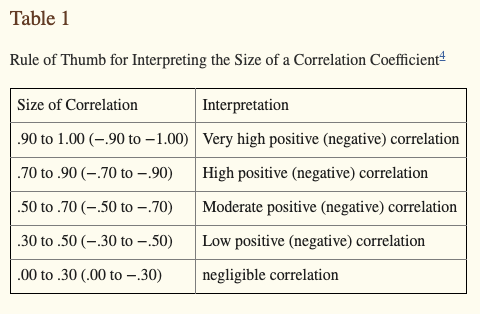</div>

**Note:** For our analysis we will define $\alpha$=.05

### `popularity` vs `averagerating`
Since we saw that `averagerating` per `primary_genre` in `df_basics_c` is not necessarily corresponding with a large number of votes, we should consider looking at how popularity correlates with ratings within the merged data base `basics_tmdb`.

$h_0$: There is no linear relationship between `popularity` and `averagerating`<br>
$h_a$: There is a linear relationship between `popularity` and `averagerating`

with a p_value<.05 we can reject the null hypothesis, there is a correlation between the two variables. However, with an `r` at .17, the relationship between `popularity` and `averagerating` is negligible and shouldn't be considered.

Popularity vs Average Rating
Correlation coefficient: 0.1666057988105624
p-value: 1.3169335576184567e-72


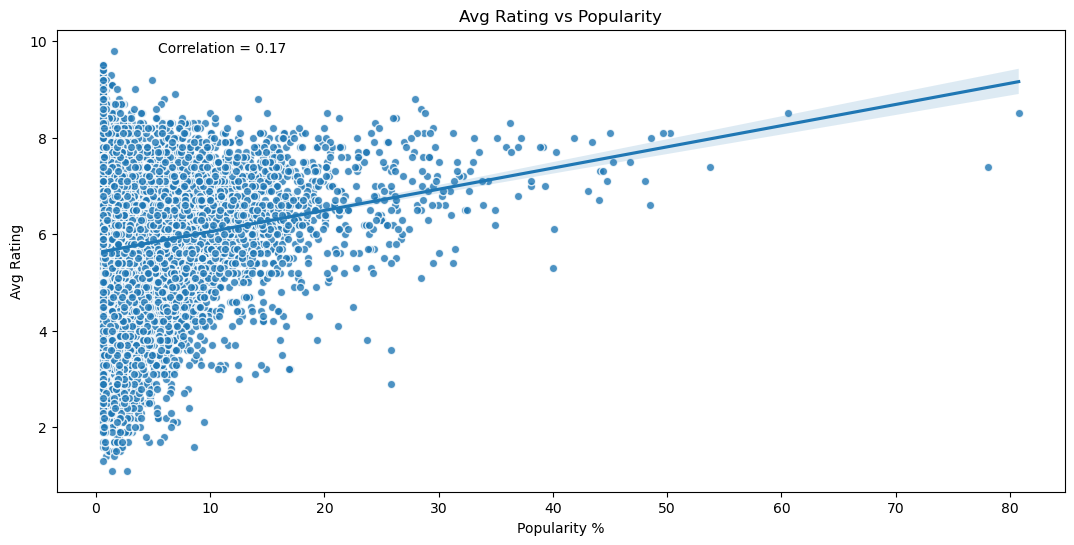

In [45]:
correlation, p_value = stats.pearsonr(basics_tmdb.popularity,basics_tmdb.averagerating)

print("Popularity vs Average Rating")
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

# Plot regplots
fig, axes = plt.subplots(figsize=(13,6),sharey=True)
sns.regplot(data=basics_tmdb,x='popularity',y='averagerating',scatter_kws={'linewidths':1,'edgecolor':'w'})
plt.title('Avg Rating vs Popularity')
plt.xlabel('Popularity %')
plt.ylabel('Avg Rating')

# Plot correlation_label
correlation_label = f'Correlation = {np.round(correlation, 2)}'
plt.text(x=.1, y=.95, s=correlation_label, transform=plt.gca().transAxes);

### `worldwide_gross` vs `popularity`, `vote_average`, and `production_budget`

$h_0$: There is no linear relationship between variable <br>
$h_a$: There is a linear relationship between variables

When looking at `worldwide_gross` revenue and comparing it with `popularity`, `vote_average`, and `production_budget`, we can see that p_value<.05, which means we can reject the null hypothesis for each conducted test. This means there is statistical significance in the correlations we see.

**`worldwide_gross` vs `popularity`**<br>
With a correlation coefficient (`r`) of ~.64, we can confirm that the more popular the movie, the higher the gross profit with a 'moderate' positive correlation. 

**`worldwide_gross` vs `vote_average`**<br>
With a `r` at ~.29, there is a negligible correlation, we can confirm that the `vote_average` is not a good signifier of `worldwide_gross` profits and should not be considered.

**`worldwide_gross` vs `production_budget`**<br>
There is a high positive correlation with `r` at ~.8, we can confirm that a higher `production_budget` is a good predicter of higher `worldwide_gross` profits.

We can visually conceptualize these relationship by the way the best-fit lines highlight the data distribution in the `sns.regplot`. While `popularity` and `production_budget` seem to have more of an impact on `worldwide_gross` with steeper slopes, `vote_average` clearly shows a less than signicant relationship with a nearly negligible slope.

Popularity vs Worldwide Gross
Correlation coefficient: 0.6422887186942021
p-value: 8.983702944346449e-152

Vote Average vs Worldwide Gross
Correlation coefficient: 0.2900890761347349
p-value: 1.4466788412482822e-26

Production Budget vs Worldwide Gross
Correlation coefficient: 0.7996040966241342
p-value: 4.393100229913725e-289


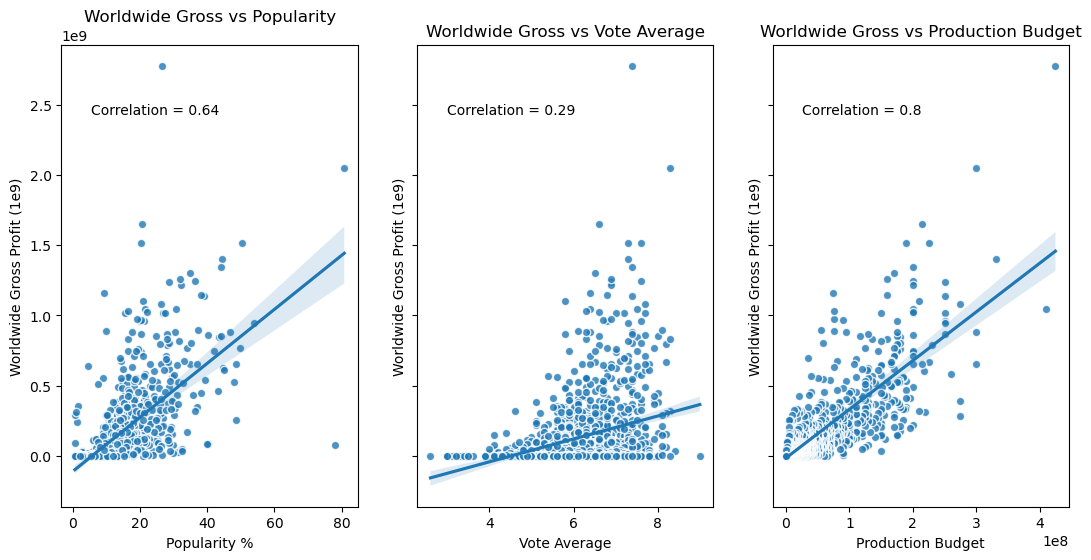

In [46]:
correlation, p_value = stats.pearsonr(tmdb_budget.popularity,tmdb_budget.worldwide_gross)
correlation1, p_value1 = stats.pearsonr(tmdb_budget.vote_average,tmdb_budget.worldwide_gross)
correlation2, p_value2 = stats.pearsonr(tmdb_budget.production_budget,tmdb_budget.worldwide_gross)

print("Popularity vs Worldwide Gross")
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

print("\nVote Average vs Worldwide Gross")
print("Correlation coefficient:", correlation1)
print("p-value:", p_value1)

print("\nProduction Budget vs Worldwide Gross")
print("Correlation coefficient:", correlation2)
print("p-value:", p_value2)


# Plot regplots
fig, axes = plt.subplots(ncols=3,figsize=(13,6),sharey=True)
sns.regplot(data=tmdb_budget,x='popularity',y='worldwide_gross',scatter_kws={'linewidths':1,'edgecolor':'w'},ax=axes[0])
axes[0].set_title('Worldwide Gross vs Popularity')
axes[0].set_xlabel('Popularity %')
axes[0].set_ylabel('Worldwide Gross Profit (1e9)')

sns.regplot(data=tmdb_budget,x='vote_average',y='worldwide_gross', scatter_kws={'linewidths':1,'edgecolor':'w'},ax=axes[1])
axes[1].set_title('Worldwide Gross vs Vote Average')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Worldwide Gross Profit (1e9)')

sns.regplot(data=tmdb_budget,x='production_budget',y='worldwide_gross', scatter_kws={'linewidths':1,'edgecolor':'w'},ax=axes[2])
axes[2].set_title('Worldwide Gross vs Production Budget')
axes[2].set_xlabel('Production Budget')
axes[2].set_ylabel('Worldwide Gross Profit (1e9)')


# Plot correlation_label
correlation_label = f'Correlation = {np.round(correlation, 2)}'
axes[0].text(x=.1, y=.85, s=correlation_label, transform=axes[0].transAxes)
correlation_label1 = f'Correlation = {np.round(correlation1, 2)}'
axes[1].text(x=.1, y=.85, s=correlation_label1, transform=axes[1].transAxes)
correlation_label2 = f'Correlation = {np.round(correlation2, 2)}'
axes[2].text(x=.1, y=.85, s=correlation_label2, transform=axes[2].transAxes);

### `production_budget` vs `popularity`

Since `production_budget` has a high positive correlation with `worldwide_gross`, we would want to see how it measures up against `popularity` and `vote_average`

$h_0$: There is no linear relationship between variable <br>
$h_a$: There is a linear relationship between variables

Again, our results statistically significant (p_value<.05). With `r` being ~.63 we have a moderate positive correlation between `production_budget` and `popularity`. We can confirm that the `production_budget` is a moderately related to `popularity`.

Meanwhile, while we might have guessed otherwise, `vote_average` and `popularity` are not as closely related with a `r` at ~.36. This means there is a low positive correlation between the two, since other relationships are stronger we may want to exclude this from our exploration. 


Production Budget vs Popularity
Correlation coefficient: 0.6254059236371357
p-value: 1.0654083597495806e-141

Vote Average vs Popularity
Correlation coefficient: 0.35860339087882986
p-value: 1.2047540028252273e-40


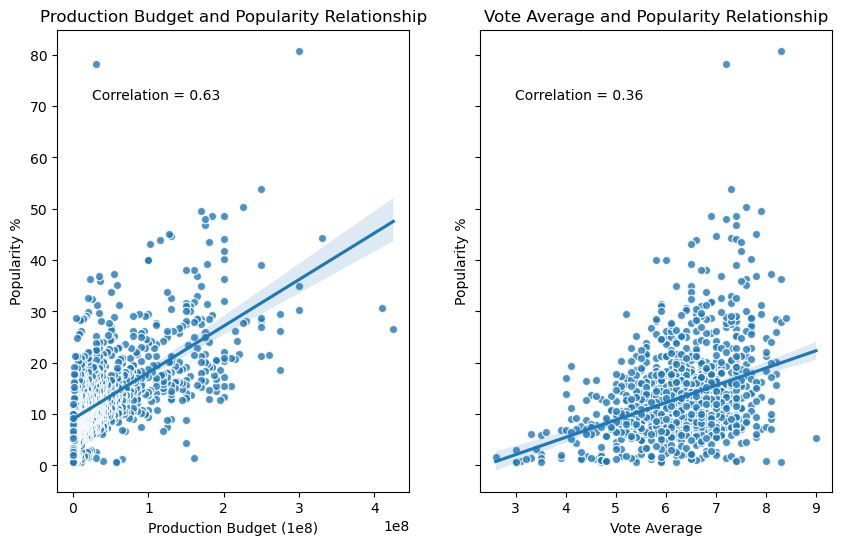

In [47]:
correlation, p_value = stats.pearsonr(tmdb_budget.production_budget,tmdb_budget.popularity)
correlation1, p_value1 = stats.pearsonr(tmdb_budget.vote_average,tmdb_budget.popularity)

print("\nProduction Budget vs Popularity")
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

print("\nVote Average vs Popularity")
print("Correlation coefficient:", correlation1)
print("p-value:", p_value1)

# Plot scatterplot
fig, axes = plt.subplots(ncols=2, figsize=(10,6),sharey=True)
sns.regplot(data=tmdb_budget,x='production_budget',y='popularity', 
            scatter_kws={'linewidths':1,'edgecolor':'w'}, ax=axes[0])
axes[0].set_title('Production Budget and Popularity Relationship')
axes[0].set_xlabel('Production Budget (1e8)')
axes[0].set_ylabel('Popularity %')

sns.regplot(data=tmdb_budget,x='vote_average',y='popularity', 
            scatter_kws={'linewidths':1,'edgecolor':'w'},ax=axes[1])
axes[1].set_title('Vote Average and Popularity Relationship')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Popularity %')

# Plot correlation_label
correlation_label = f'Correlation = {np.round(correlation, 2)}'
axes[0].text(x=.1, y=.85, s=correlation_label, transform=axes[0].transAxes)
correlation_label1 = f'Correlation = {np.round(correlation1, 2)}'
axes[1].text(x=.1, y=.85, s=correlation_label1, transform=axes[1].transAxes);

### Primary Genre Analysis

**ANOVA test to validate `worldwide_gross` differs between each `primary_genre`**

Before we dive into identifying the genres in which we want to invest, we shoudl verify our hypothesis that `worldwide_gross` differs based on genre by conducing a one way ANOVA test. We will define $\alpha$=.05.

**Note:** Due to varying sample sizes for each genre, this test may not be perfectly suited. Nonetheless, the ANOVA test will provide an initial indication of whether the gross varies significantly among genres. Before performing the test, we'll filter out genres with a sample size less than 20 to prevent too much skew in the data.

$h_0$: There is no significant difference in means among `worldwide_gross` and `primary_genre`.<br>
$h_a$: There is a significant difference in means among `worldwide_gross` and `primary_genre`.

With a `p_value`<.05 we can conclude that our F-statistic is likely accurate (reject $h_0$) and since our F-statistic is greater than our Critical Value, we can confirm that there is a difference in means between the two groups observed. 

Since there is a difference in `worldwide_gross` when it comes to `primary_genre` and it makes sense for us to look into which genres are worth the investment based on the profit they bring.

In [48]:
# Filter out genres with small sample sizes
genre_counts = tmdb_budget['primary_genre'].value_counts() 
valid_genres = genre_counts[genre_counts >= 20].index
df_filtered = tmdb_budget[tmdb_budget['primary_genre'].isin(valid_genres)]

# Define degrees of freedom and find critical value
dfn = len(valid_genres)-1
dfd = len(df_filtered)*len(valid_genres)
critical_value = stats.f.ppf(1-.05,dfn,dfd)

#Group by 'primary_genre' and 'worldwide_gross'
genre_groups = df_filtered.groupby('primary_genre',observed=True)['worldwide_gross']
genre_data = [group[1] for group in genre_groups]

#Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(*genre_data)

print('Critical Value:', critical_value)
print("F-statistic:", f_statistic)
print("P-value:", p_value)

Critical Value: 1.7892869383179846
F-statistic: 27.719634916063193
P-value: 3.315875749293241e-52


Now that we understand the relationships between some of the main data and we have confirmed that `worldwide_gross` differs significantly among the different genres, we can start thinking about how to narrow down our recommendations based on data such as `production_budget`, `popularity`, and `primary_genre`.

We now want to see if it makes sense to narrow those down the genres by comparing `primary_genre` to `worldwide_gross` and `popularity`. It is interesting to visualize these details because while something may not be produced very much such as `science_fiction`, it can be quite profitable as well as popular.

Looking at `worldwide_gross` as compared with `production_budget` which had the highest positive correlation will be our priority. Then we would want to account for `popularity` as well since it had a moderate positive correlation to `worldwide_gross`.

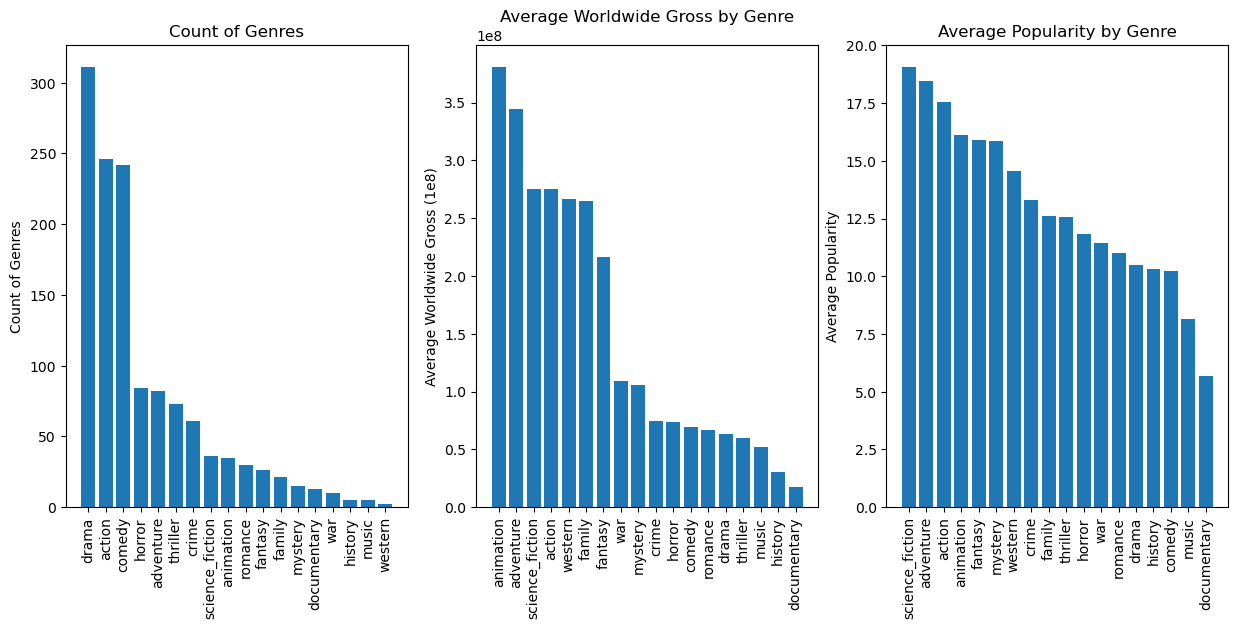

In [49]:
# Convert `primary_genre` to categorical
tmdb_budget.primary_genre = pd.Categorical(tmdb_budget.primary_genre)

# Get genre names & count
genres = tmdb_budget.primary_genre.value_counts().index
genre_counts = tmdb_budget.primary_genre.value_counts().values

# Get average `worldwide_gross` for each genre
gross_genre = tmdb_budget.groupby('primary_genre',observed=True)[['worldwide_gross']].mean()
gross_genre_values = gross_genre.sort_values(by='worldwide_gross',ascending=False).values
gross_genre_names = gross_genre.sort_values(by='worldwide_gross',ascending=False).index

# Get average `popularity` for each genre
pop_genre = tmdb_budget.groupby('primary_genre',observed=True)[['popularity']].mean()
pop_genre_values = pop_genre.sort_values(by='popularity',ascending=False).values
pop_genre_names = pop_genre.sort_values(by='popularity',ascending=False).index

# Plot the bar graphs
fig, ax = plt.subplots(ncols=3, figsize=(15,6))

ax[0].bar(genres,genre_counts)
ax[0].set_ylabel('Count of Genres')
ax[0].set_title('Count of Genres')
ax[0].set_xticks(range(len(genres)))
ax[0].set_xticklabels(genres,rotation=90)


ax[1].bar(gross_genre_names,gross_genre_values.flatten())
ax[1].set_ylabel('Average Worldwide Gross (1e8)')
ax[1].set_title('Average Worldwide Gross by Genre')
ax[1].set_xticks(range(len(gross_genre_names)))
ax[1].set_xticklabels(gross_genre_names,rotation=90)


ax[2].bar(pop_genre_names,pop_genre_values.flatten())
ax[2].set_ylabel('Average Popularity')
ax[2].set_title('Average Popularity by Genre')
ax[2].set_xticks(range(len(pop_genre_names)))
ax[2].set_xticklabels(pop_genre_names,rotation=90)



plt.show();

Visualizing these details all together below, we can conclude that from the perspective of highest grossing genres that are not only profitable but popular among viewers, the following are the top 6 genres with which we will initiate phase 1.

- Animation
- Adventure
- Science Fiction
- Action
- Family
- Fantasy

**Note:** Though comedy and drama, make up many of the movies in our data subset, they are not as popular as one would expect nor nearly as profitable as other genres.

From this visual we are also able to understand which genres make a worthy investment. **Animation** and **Adventure**, though less frequent in our dataset with a high `production_budget`, is highest grossing and therefore a genre we will definitely be exploring and tapping into the underutilzied market. **Action** is another genre we will invest in as it is fairly profitable and popular with a moderate `production_budget`. 

**Science Fiction** is an interesting winner because it is the most popular genre though not as profitable as others like Animation.

Lastly, **Fantasy** and **Family** are genres we would want to consider as well, as they are fairly profitable with a moderate `production_budget`. While *Westerns* bring in more revenue, they make up a very small portion of the dataset, and are less popular than *Fantasy* so we will be excluding them from phase 1 of the business launch.

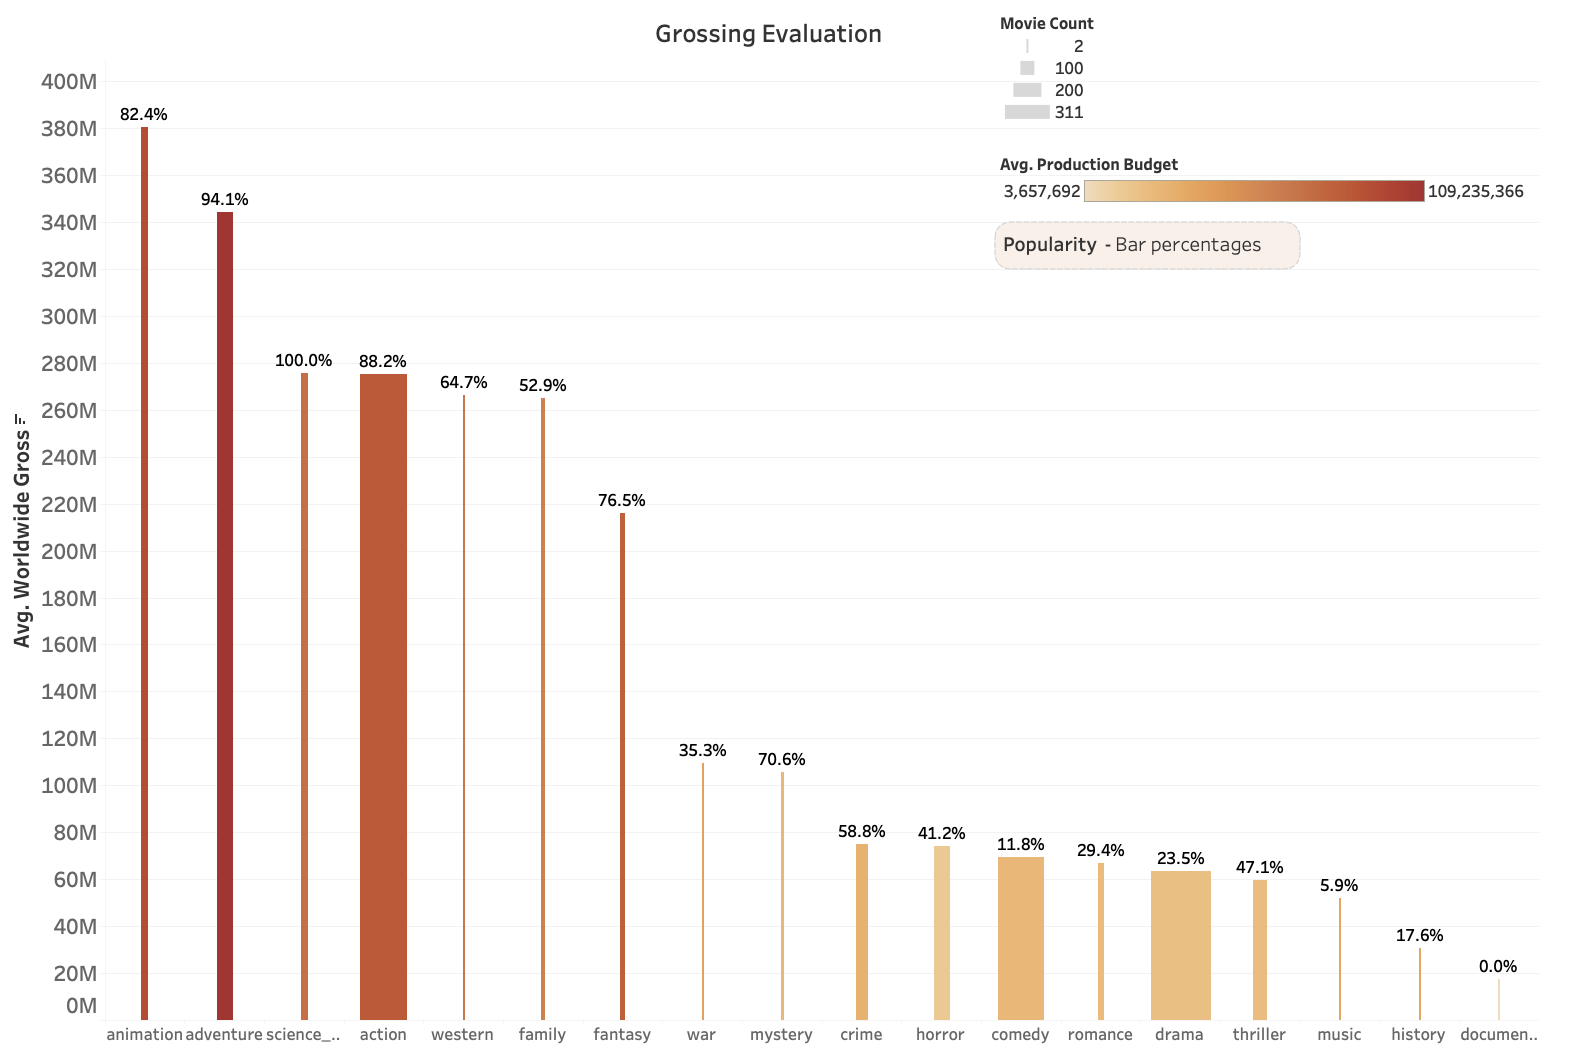

Lastly, we would want to determine relative budgets for each genre we are considering. We want to make sure that our grossing profits are at least as profitable as the appropriate measure of central tendency representing `production_budget` since that is the greatest correlation with `worldwide_gross`. Looking at the raw numbers in a table doesn't provide us enough of an understanding which measure of central tendency is representative for each genre of interest.

In [50]:
# Get the average production budget of the top grossing movies world wide while taking productivity into consideration
ww_gross_index = tmdb_budget.worldwide_gross.value_counts().index
grouped_df = tmdb_budget.loc[tmdb_budget.worldwide_gross.isin(ww_gross_index),['primary_genre','worldwide_gross','production_budget','popularity']]

aggregations = {'worldwide_gross':'mean','production_budget':['mean','median','min'],'popularity':['mean']}
grouped_df = grouped_df.groupby('primary_genre',observed=True).agg(aggregations)
grouped_df.columns = ['Gross Mean','Budget Mean','Budget Median','Budget Min', 'Popularity Mean']
grouped_df.sort_values(by=['Gross Mean','Popularity Mean'],ascending=False)

,Gross Mean,Budget Mean,Budget Median,Budget Min,Popularity Mean
primary_genre,,,,,
animation,3.806330e+08,9.305714e+07,80000000.0,8000000,16.128457
adventure,3.441876e+08,1.092354e+08,99500000.0,1500000,18.468646
science_fiction,2.756185e+08,7.275403e+07,52600000.0,20000,19.055528
action,2.753119e+08,8.568577e+07,60000000.0,500000,17.547415
western,2.664990e+08,6.865000e+07,68650000.0,2300000,14.566500
family,2.651831e+08,6.145238e+07,36000000.0,2000000,12.594429
fantasy,2.161474e+08,8.158077e+07,58100000.0,2300000,15.890192
war,1.093101e+08,3.978000e+07,35000000.0,1300000,11.445200
mystery,1.058252e+08,2.564667e+07,19000000.0,200000,15.837067


Visualizing the `production_budget` in a boxplot, we can see where most data points lie within each genre and make some decisions about appropriate budget. We can conclude that the mean is not the best measure in this case since all of our data is fairly skewed. In the case of these genres, we will want to base our `production_budget` on the medium since most data points are gathered around the median.

<div style = "text-align: center;"> 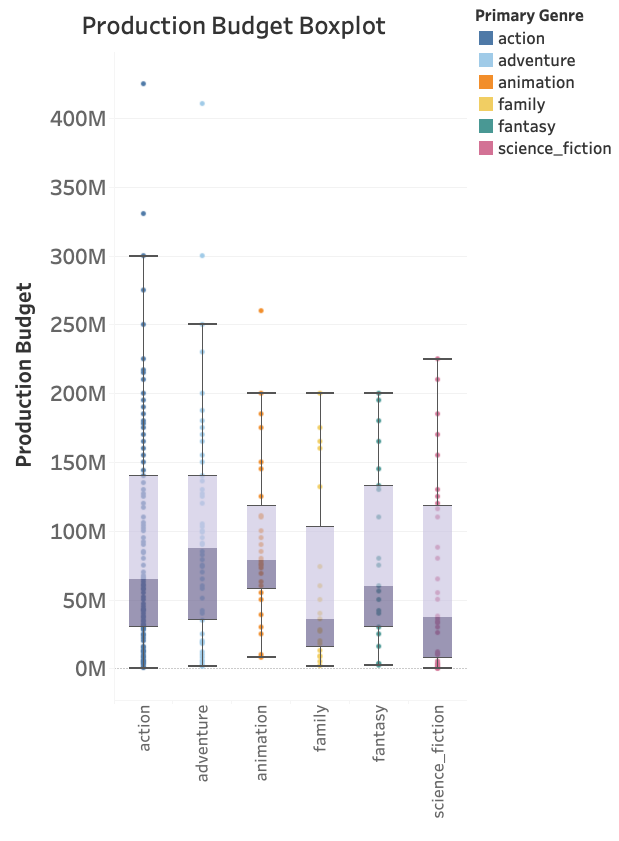</div>

Here we can see the median `production_budget` for the relevant genres. A good starting point to our movie industry endevour.

<div style = "text-align: center;"> 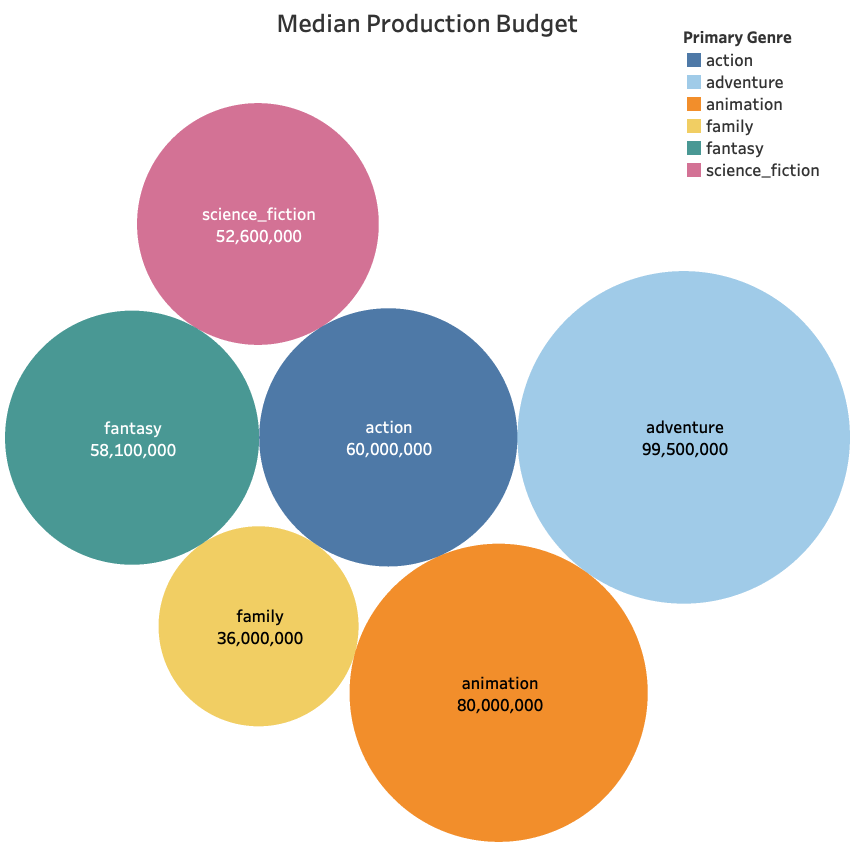</div>

## 6. Recommendations & Conclusion

**Data Limitation**

While there was a large amount of data available for analysis, much of the datasets and tables lacked appropriate information to add significance to analysis. Some of the main datasets we would have liked to have used include; `rt.reviews.tsv` to evaluate critic ratings and `rt.movie_info.tsv` to get box office information. However, we lacked enough information to be able to pair reviews with genre and box office information was missing ~80% of data. Unfortunately both datasets containing funding information were small compared to some of the other data, we decided to work with the `tn.movie_budgets.csv` as it had more complete information than the `bom.movie_gross.csv`. <br>

**Recommendations** <br>

<u>*Genres:*</u><br>
For phase 1 we are investing in the following genres: **action, adventure, animation, family, fantasy, and science fiction**. We looked at a variety of factors, primarily `worldwide_gross` and `popularity`. We chose highly grossing genres as well as popular untapped markets such as Science Fiction. 


<u>*Starting Production Budget by Genre:*</u><br>
After viewing the distribution of values in our boxplot, we decided to focus on the median `production_budget` for each genre rather than the mean since the data was skewed towards the median and the mean was not a good representation. As these are starting budgets, there is room for flexibility based on specific projects, which will be determined by those working on the specific project when the time comes. This aligns with our findings stating that a higher `production_budget` is positively correlated with `popularity` as well as `worldwide_gross`.
- *Action:* 60,000,000 <br>
- *Adventure:* 99,500,000 <br>
- *Animation:* 80,000,000 <br>
- *Family:* 36,000,000 <br>
- *Fantasy:* 58,100,000 <br>
- *Science Fiction:* 52,600,000 <br>


<u>*Creators by Genre:*</u><br>
After identifying which genres we were starting with in phase 1, we took to other IMDb data on creators to find talents relevant for each genre. Of course, as we grow we want to give these individuals the chance to branch out as well, this is something we will consider on a per project basis.

*Directors:*
- *Animation:* Sumnash Sri Kaljai, Brent Triplett, and Hiroshi Nagahama <br>
- *Action:* Himesh Bhargo, Alper Caglar, and Christopher Nolan <br>
- *Science Fiction:* Erkut Altindag, M. Fahad Khan, and Eren Ozkural <br>
- *Adventure:* Karzan Kardozi, Zolbayar, Drj, Zack Bennett <br>
- *Family:* Elizabeth Blake-Thomas, Torfinn Iversen, and Ravi Jadhav <br>
- *Fantasy:* Matt Lang, Jennifer phillips, and Sung-hee Jo <br>

*Writers:*
- *Animation:* Usha Kaljai, Tony Schnur, and Yuki Urushibara <br>
- *Action:* Navdeep Maju, Alper Caglar, and Christopher Nolan<br>
- *Science Fiction:* Erkut Altindag, M Fahad Kahan, and Eren Ozkural  <br>
- *Adventure:* Karzan Kardozi, Zolbayar Dorj, and Zack Bennet <br>
- *Family:* Jonathan Brayley, Torfin Iversen, and Ravi Jadhav <br>
- *Fantasy:* Joe Walker, Jennifer Phillips, Sung-hee Jo <br>



**Conclusion** <br>

<u>*Phase 1:*</u><br>
For phase 1 of this business initiative we are focusing on making a name for ourselves as we are already well known in the industry but have not ventured into creation of movies as of yet. We are excited to make our mark and to do so, we must prioritize profit to ensure we can successfully move on with next step expansion and invest in worthy stories. <br>

While we did not include all genres of interst to our founder as their ideal portfolio is more dynamic than realistically accomplishable for phase 1, but we were able to include a diverse starter list that addresses profit as well as popularity.

We would love to work with a variety of creators and provide a platform that sets both, those we work with as well as our company up for success. While we have defined a starting budget per genre, this is just a guideline and there will be room for flexibility when a specific project launches.<br>

<u>*Looking Ahead:*</u><br>
As we continue to make our mark in the movie industry, we would want to take a deeper dive into both, what viewers prefer as well as what values we align with. The *date range* which we evaluated was limited by our data so we would be curious to evaluate data past 2020 as well. <br>

Language and region is not something we delf deep but we would like to look into how *language* and *region* plays a role in metrics we evaluated during our analysis for phase 1. <br>

As mentioned in *data limitations* we would love to take a closer look at critic reviews and box office information as this will direct us even better towards understanding how to define success within our projects. <br>

In addition, certain data had information about creators who participated in the movies we had access to, but it lacked *demographic information* we would want to take into account. We are interested in investing in stories from minorities and other less represented populations.<br>

We are also going to take a deeper dive into *ROI (return on investment)* metrics in relation to gross profit and production budget, as we do value being able to continue growing while investing in passion projects.